# 텐서플로우 이미지 분류 : 옷 이미지 분류 예제 따라하기

## https://www.tensorflow.org/tutorials/keras/classification
### [2022년 6월4일 ~ 6월10일]

### 해당 예제에서는 신경망 네트워크를 활용한 "신발 & 옷" 이미지를 분류하는 모델을 개발해봅니다

## 환경 설정

In [1]:
# !pip install tensorflow=="2.8.0"

In [2]:
# !pip install protobuf=3.20.1

In [3]:
# 아래 에러 발생시 !pip install protobuf=3.20.1    으로 protobuf downgrade 시도 진행

# TypeError: Descriptors cannot not be created directly.
# If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
# If you cannot immediately regenerate your protos, some other possible workarounds are:
#  1. Downgrade the protobuf package to 3.20.x or lower.
#  2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

# More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [4]:
# !pip install matplotlib

In [5]:
# !pip install numpy

In [6]:
# TensorFlow and tf.keras 불러오기 (해당 예제에서는 tf 2.8.0 버전을 사용합니다.
# 해당 코드 실행시 ModuleNotFoundError: No module named 'tensorflow' 에러가 일어나면, 위 pip install tensorflow=="2.8.0" 실행해주세요
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)



2.8.0


In [7]:
# 사용할 GPU 지정    https://velog.io/@jaeha0725/%ED%8A%B9%EC%A0%95-GPU-%EC%A7%80%EC%A0%95-os.environCUDAVISIBLEDEVICES
os.environ["CUDA_VISIBLE_DEVICES"]="0"

## 패션 MNIST 데이터 불러오기

## Fashion MNIST은 어떤 데이터인가?
참고 : https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

![image.png](https://www.tensorflow.org/images/fashion-mnist-sprite.png)


- 70000장의 흑백 셔츠, 바지, 신발 그림 데이터
- 10개의 카테고리로 분류되어 있다

| Label | Description |
|:-----:|-------------|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |
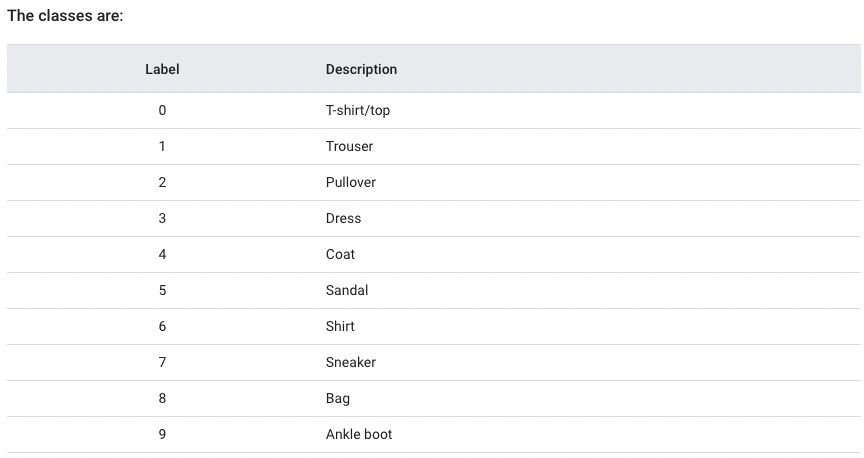

In [8]:
# keras.datasets에서 fashion_mnist 데이터를 불러온다.
# keras.datasets에 있는 활용할 수 있는 여러 데이터 종류 : https://keras.io/ko/datasets/
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
# 위에서 (train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data() 코드를 활용해 
# 데이터를 불러왔을때 어떠한 형식으로 데이터가 불러와지는게 확인해보자

In [10]:
# 학습 이미지
print(type(train_images))
print(train_images.shape)

# 6만장의 train 이미지, 사이즈 28x28

<class 'numpy.ndarray'>
(60000, 28, 28)


In [11]:
# 학습 레이블
print(train_labels.shape)
print(train_labels[0:10])

(60000,)
[9 0 0 3 0 2 7 2 5 5]


In [12]:
# 학습 레이블 unique 값
print(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]


In [13]:
# 검즘 데이터
print(test_images.shape)
print(test_labels.shape)
print(np.unique(test_labels))

(10000, 28, 28)
(10000,)
[0 1 2 3 4 5 6 7 8 9]


In [14]:
# 0~9까지의 숫자로 주어진 label은 아래 class_names 리스트의 인덱스로 매핑됩니다! (즉, 위에서 labels에 3은 'Dress'를 의미합니다)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 가공
### 신경망 모델을 사용해 이미지 데이터를 학습하고자 하는 경우, 기존 픽셀값의 범위 0~255를 0~1 사이로 변환해줘야합니다.





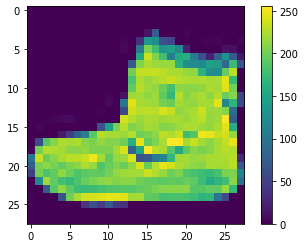

In [15]:
# 아래에서 현재 이미지의 각 픽셀의 값을 시각화 한 것입니다. 
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [16]:
# 아래 코드를 실행해 모든 픽셀 값은 255.0으로 나눠주기
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [17]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [18]:

train_images = train_images / 255.0
test_images = test_images / 255.0

In [19]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    


### class_names 와 train_labels에 주어진 0~9 숫자가 잘 매칭되는지 확인하기위해 아래 plot을 확인해 봅시다

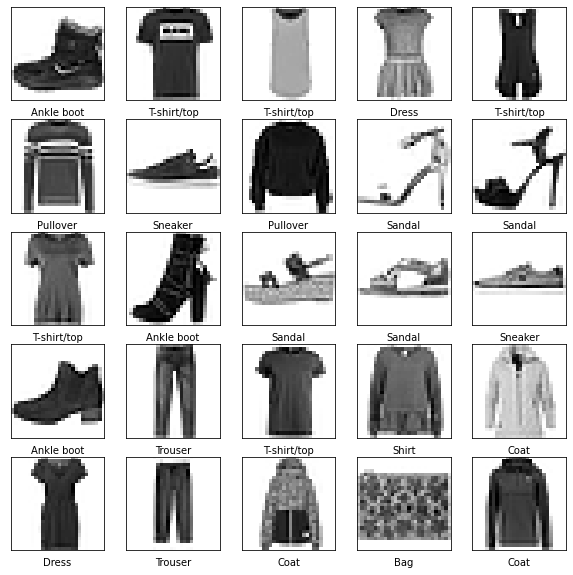

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 쌓아 만들기

### 신경망 모델을 만들기 위해서는 각 층에 대한 정의와 모델 컴파일을 진행해야 합니다.

### 신경말 모델 층 쌓기


In [21]:
# 바로 아래 셀을 여러번 실행해야하는 경우, 해당 코드를 실행하여 clear 해주는 습관을 가집시다 : https://www.projectpro.io/recipes/what-is-tf-clear-session-why-is-it-required
tf.keras.backend.clear_session()

In [22]:
%%capture
model = tf.keras.Sequential(
    [tf.keras.layers.Flatten(input_shape=(28,28)), 
     tf.keras.layers.Dense(128, activation = 'relu'),
     tf.keras.layers.Dense(10)
     ]
)

2022-06-10 16:42:22.979872: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-10 16:42:22.998837: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-10 16:42:23.000232: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-10 16:42:23.002074: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [23]:
# 위 모델의 각 층을 지나면서 shape이 어떻게 변하는지 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 아래와 같은 방식으로 레이어를 하나씩 쌓아줄 수 있다 (모델을 가져와 레이어를 추가로 넣어줄때는 아래와 같은 코드 활용)

# model_view = tf.keras.Sequential()
# model_view.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# model_view.summary()



### 레이어별 설명

- tf.keras.layers.Flatten(input_shape=(28,28))
    - 28 x 28 이미지 (2차원 array 형식)의 이미지가 해당 레이어를 지나면서 길이 784개 픽셀의 (28 * 28 = 784 pixels) 1차원 array 형식으로 변합니다. 28개 행으로 이루어져있던 2차원 형식을 픽셀값 하나씩 한줄로 나열했다고 생각하면 됩니다.
    - 해당 레이어에서는 학습되어 변하는 가중치(weight)는 존재하지 않고, 들어오는 이미지의 형식만 변환합니다.
    
</br>

- 아래 두개의 층은 밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 층이라고 부릅니다. 같은 Dense 층이지만, 약간 다른 역활을 합니다
    - tf.keras.layers.Dense(128, activation = 'relu')
        -   128개의 노드(또는 뉴런)를 가진 층으로 activation 함수로 'relu'를 사용합니다 ()
            - ReLU(Rectified Linear Unit, 경사함수)는 가장 많이 사용되는 활성화 함수 중 하나이며 아래와 같은 형태를 띄고있다
            <br>
                ![image.png](https://mblogthumb-phinf.pstatic.net/MjAyMDAyMjVfOTIg/MDAxNTgyNjA4MzI2NDA5.e0VyX0yrhE5gtfPjni7IxF5kpArCeByreQsdOMB0240g.CWwTi57bPtAK6C7eLmRn1ED2RE8Lm_C6sVIwMGJS1Akg.PNG.handuelly/image.png?type=w800)
                
                x가 0보다 크면 기울기가 1인 직선, 0보다 작으면 함수 값이 0이 된다. 이는 0보다 작은 값들에서 뉴런이 죽을 수 있는 단점을 야기한다. 
            <br>
            또한 sigmoid, tanh 함수보다 학습이 빠르고, 연산 비용이 적고, 구현이 매우 간단하다는 특징이 있다. (참고 : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=handuelly&logNo=221824080339)
</br>
    - tf.keras.layers.Dense(10)
        - 해당 마지막 층은 10개의 노드의 소프트맥스(softmax) 층으로 0~9 (10개)의 레이블에 대하여 확률을 돌려주는 층, 10개의 모든 값의 합은 1이 되는 층이다.


## 모델 컴파일 하기

### 모델을 훈련하기전에 위에서 레이어를 쌓은 모델에 "컴파일" 이라는 추가작업이 필요합니다.

손실 함수 (loss) - 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 합니다. https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
<br>
옵티마이저 (optimizer) - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다. https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
<br>
메트릭 (metrics) — 훈련 및 테스트 단계를 모니터링하는 데 사용됩니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다. https://www.tensorflow.org/api_docs/python/tf/keras/metrics

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

## 모델 훈련하기

### 신경망 모델을 훈련하려면 다음 단계가 필요합니다 :



1. 훈련데이터를(이미지, 레이블) 모델에 넣어주기
2. 모델이 이미지와 레이블을 매핑하는 방법을 배워갑니다
3. 테스트 세트에(이미지, 레이블) 대한 모델의 예측을 만듭니다. 



In [26]:
# 훈련을 시작하려면 model.fit 메서드를 호출합니다. 모델을 훈련 데이터에 "맞추기(fit)" 때문에 이렇게 불립니다.
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
  74/1875 [>.............................] - ETA: 3s - loss: 1.0344 - accuracy: 0.6394 

2022-06-10 16:42:30.898608: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1875/1875 [==============================] - 6s 2ms/step - loss: 0.5009 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3730 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3363 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3117 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2968 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2820 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2687 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2574 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2468 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2409 - accurac

In [27]:
# 모델 학습 후 .h5 형식으로 저장하기 (해당 세션이 만료되어도 model 변수를 추후 사용하기 위해 저장하기)

model.save("Classify_images_of_clothing.h5")

In [28]:
model_saved = tf.keras.models.load_model('Classify_images_of_clothing.h5')

In [29]:
model_saved.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


모델이 훈련되면서 손실과 정확도 지표가 출력됩니다. 이 모델은 훈련 세트에서 약 0.9112(91%) 정도의 정확도를 달성합니다.

### 정확도 평가
다음으로, 모델이 테스트 데이터세트에서 작동하는 방식을 비교합니다.



여기서, .h5 형식으로 저장해 다시 불러온 모델과 위에서 학습하며 얻은 모델의 차이가 있는지 보겠습니다.

In [30]:
# 변수로 해당 세션에서 학습된 model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3349 - accuracy: 0.8855 - 619ms/epoch - 2ms/step

Test accuracy: 0.8855000138282776


In [31]:
# .h5 형식으로 저장해 다시 불러온 경우
test_loss, test_acc = model_saved.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3349 - accuracy: 0.8855 - 579ms/epoch - 2ms/step

Test accuracy: 0.8855000138282776


테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮습니다. 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting) 때문입니다. 과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말합니다.

- 과대적합 시연 (https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
- 과대적합을 방지하기 위한 전략 (https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

## 예측하기

### 훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있습니다. 모델의 선형 출력, 로짓. 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환합니다.

In [32]:
probability_model = tf.keras.Sequential(
    [model_saved,tf.keras.layers.Softmax()]
    )

In [33]:
predictions = probability_model.predict(test_images)

In [34]:
# 소프르맥스 레이어 추가안하고 비교를 위해 진행
model_saved_predictions = model_saved.predict(test_images)

여기서는 테스트 세트에 있는 각 이미지의 레이블을 예측했습니다. 첫 번째 예측을 확인:

In [35]:
predictions[0]

array([1.0679030e-06, 1.9820057e-09, 1.6666217e-08, 8.9782057e-09,
       1.2546523e-06, 5.8662886e-04, 1.4341367e-07, 4.5916073e-02,
       2.4963756e-08, 9.5349479e-01], dtype=float32)

In [36]:
# 소프트맥스를 사용하지 않는경우 0~1사이 총합 1이 아닌 형태로 보임. 그래서 softmax 층 추가해주어야 함
model_saved_predictions[0]


array([ -7.9472075, -14.236549 , -12.107275 , -12.72586  ,  -7.786046 ,
        -1.6385115,  -9.954926 ,   2.7216666, -11.703234 ,   5.7549853],
      dtype=float32)

In [37]:
# 이 예측은 10개의 숫자 배열로 나타납니다. 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다. 가장 높은 신뢰도를 가진 레이블을 np.argmax() 함수를 사용해 나타내봅시다
np.argmax(predictions[0])

9

In [38]:
#모델은 이 이미지가 앵클 부츠(class_name[9])라고 가장 확신하고 있습니다. 이 값이 맞는지 테스트 레이블을 확인해봅시다
test_labels[0]

9

### 10개 클래스에 대한 예측을 모두 그래프로 표현해 보겠습니다:

In [39]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')  #예측 빨강
  thisplot[true_label].set_color('blue')      #실제 파랑

## 예측 확인

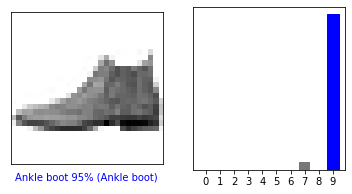

In [40]:

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

#예측 빨강
#실제 파랑

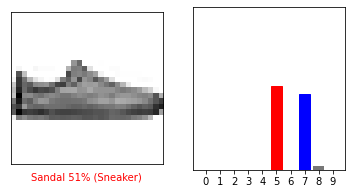

In [41]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

### subplot 함수를 사용해 한번에 여러 결과를 한눈에 볼 수 있도록 아래 코드 실행

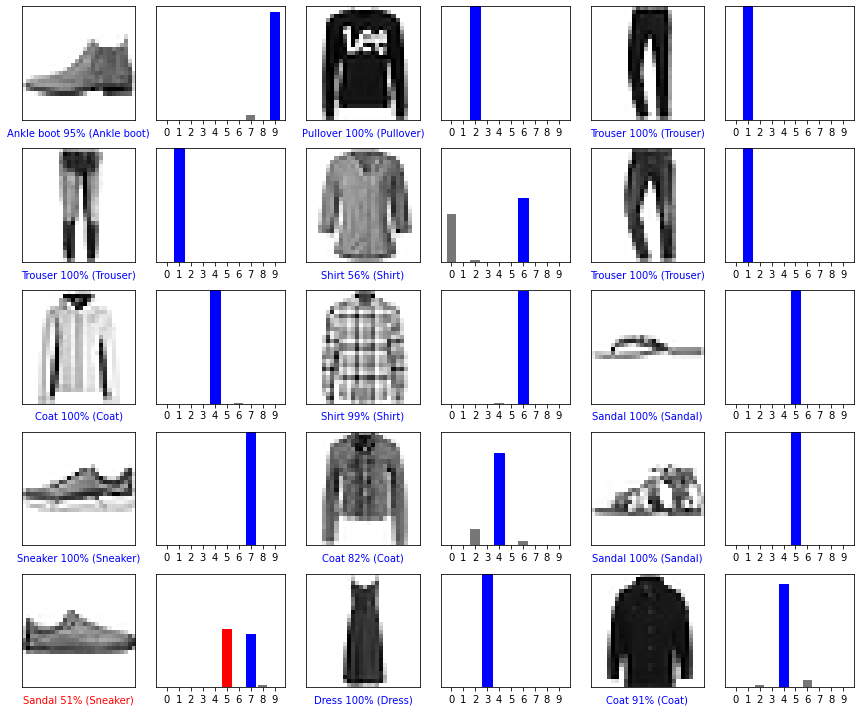

In [42]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 학습된 모델 사용하기
실험 이미지 하나에 대해서 해당 모델 테스트 해보세요

In [43]:
# 테스트 데이터에서 이미지 하나 불러오기
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras 모델은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화되어 있습니다. 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 합니다:

In [44]:
# np.expand_dims() 사용해 이미지를 2차원 배열에 넣어주기
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [45]:
img

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.05098039, 0.2627451 , 0.        , 0.        , 0.        ,
         0.        , 0.19607843, 0.14901961, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.03137255, 0.47058824, 0.81960784,
         0.88627451, 0.96862745, 0.92941176, 1.        , 1.        ,
         1.        , 0.96862745, 0.93333333, 0.92156863, 0.6745098 ,
         0.28235294, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.5372549 , 0.9372549 , 0.98823529, 0.95294118,
         0.91764706, 0.89803922, 0.93333333, 0.95686275, 0.96470588,
         0.

In [46]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.96779287e-05 1.95979153e-11 9.99257982e-01 1.59984720e-10
  6.75161660e-04 1.02864494e-14 2.71853860e-05 2.84794211e-18
  3.73269832e-10 4.11444620e-12]]


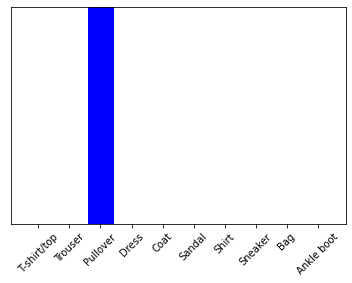

In [47]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [48]:
print(np.argmax(predictions_single[0]))
print(class_names[np.argmax(predictions_single[0])])

2
Pullover
